<a href="https://colab.research.google.com/github/zulqurtubia/DataMining3/blob/main/JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def Perceptron(x_unit,t,max_epoch,learning_rate=1,threshold=0):
    # Step 0
    w = np.zeros(x_unit.shape[1])
    b = 0
    epoch = 1
    
    # Step 1
    while epoch < max_epoch:
        stop = True
        # Step 2
        for i in range(x_unit.shape[0]):
            # Step 3 adalah x_unit
            # Step 4
            y_in = b + sum(x_unit[i,:]*w)
            if y_in > threshold:
                y = 1
            elif y_in < -threshold:
                y = -1
            else:
                y = 0
                
            temp_w = np.copy(w)
            temp_b = np.copy(b)
            
            # Step 5
            if y != t[i]:
                w += learning_rate*t[i]*x_unit[i,:]
                b += learning_rate*t[i]
                
            dw = w - temp_w
            db = b - temp_b
            
            if (not np.array_equal(dw,np.zeros(dw.shape))) or (db!=0):
                stop = False
        # Step 6
        if stop:
            break
            
        epoch += 1
    return w,b

In [3]:
def PredictPerceptron(x_input,weight,bias,threshold=0):
    y_in = bias + sum(x_input*weight)
    
    if y_in > threshold:
        y = 1
    elif y_in < -threshold:
        y = -1
    else:
        y = 0
    return y

In [4]:
def PlotPerceptron(x_unit,target,weight,bias,title=""):
    # Plot titik
    color = {-1:"r",1:"b"}
    sns.scatterplot(x_unit[:,0],x_unit[:,1],hue=target,s=200,legend="full",palette=color)
    
    # Plot sumbu-x dan sumbu-y
    plt.hlines(0,-2,2)
    plt.vlines(0,-2,2)
    
    # Plot persamaan garis
    x = np.array([-2,2])
    m = -weight[0]/weight[1]
    n = -bias/weight[1]
    y = m*x + n
    plt.plot(x,y,"g-")
    
    plt.title("Perceptron "+title)
    plt.legend(title="Target")
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xticks([])
    plt.yticks([])

In [5]:
# Input
x1 = np.array([[1,1,-1],
                [-1,1,1]])
# Target
t1 = np.array([1,-1])

# Perhitungan bobot dan bias dengan metode perceptron
w1,b1 = Perceptron(x1,t1,100)

# Prediksi target
pred1 = [PredictPerceptron(x,w1,b1) for x in x1]

In [6]:
for i in range(len(pred1)):
    print("Input",x1[i,:],"\tmemiliki target:",t1[i],"\thasil prediksi:",pred1[i])

Input [ 1  1 -1] 	memiliki target: 1 	hasil prediksi: 1
Input [-1  1  1] 	memiliki target: -1 	hasil prediksi: -1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


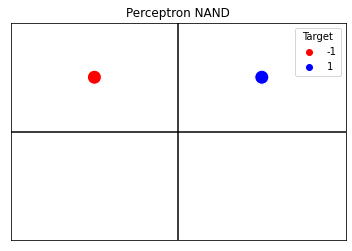

In [7]:
PlotPerceptron(x1,t1,w1,b1,title="NAND")